# RocketML Tutorial on distributed object detection on videos

## Import Libraries

In [25]:
from rocketml.io import VideoSet, MongoWriter, Video
from rocketml.feature_extraction import ObjectDetection
from rocketml.pipeline import Pipeline
import numpy as np
import sys
import os
import pymongo
from pprint import pprint
import subprocess
from time import time

In [26]:
import cv2 as cv; print('OpenCV Version:',cv.__version__)
import tensorflow as tf; print('TensorFlow Version:',tf.__version__)

('OpenCV Version:', '3.4.1-dev')
('TensorFlow Version:', '1.8.0')


In [27]:
#Simple Generator-->To clear rerun
def simple_gen():
    for x in range(100):
        yield x
        
x=simple_gen()

In [28]:
num=next(x)#<--generate the next sequence number
num

0

## Defaults


In [29]:
default_location='/home/ubuntu/test_folder/object_detection/object_detection_models_config.json'

start = time()
filename = "/home/ubuntu/rml-notebooks/home_video_list_4.txt"
# Image Set
vm = VideoSet(filename,resize_width=64,resize_height=64,frame_rate=10)

# Get uri
hname = subprocess.check_output(["hostname"])
mongo_uri = "mongodb://"+hname.strip()+":27017"

# MongoWriter
mw = MongoWriter(uri=mongo_uri,db="rml_default_database_"+str(num),collection="default_collection_"+str(num))

# Object Detection
od = ObjectDetection(model_type="ssd_inception_v2_coco_2017_11_17",model_framework="tensorflow",object_detection_models_config=default_location)
#od = ObjectDetection(model_type="yolo_v2",model_framework="darknet",object_detection_models_config=test_location)



# Pipeline
pipeline = Pipeline([od,mw])
pipeline.fit(vm,cores="all",verbose=True)



print("Time for object detection = %0.2f"%(time()-start))

Video file /home/ubuntu/rocketml-dev/data/home-videos/santi_lr_1.MOV is dropped
Video file /home/ubuntu/rocketml-dev/data/home-videos/santi_lr_2.MOV is dropped
Video file /home/ubuntu/rocketml-dev/data/home-videos/santi_lr_3.MOV is dropped
Video file /home/ubuntu/rocketml-dev/data/home-videos/santi_lr_5.MOV is dropped
video


ValueError: No videos to add to file /shared/jobs_folder/d09d3e1d/input.txt

## Draw objects on a single video

In [30]:
vid = Video(filename="/home/ubuntu/test_images/SampleVideo_1280x720_10mb.mp4")
vid.draw_objects(mw,"/home/ubuntu/test_images/default_video_"+str(num)+".mp4")

[]


TypeError: 'NoneType' object has no attribute '__getitem__'

**Inspect JSON**
--------

In [80]:
import json
with open('/home/ubuntu/test_folder/object_detection/object_detection_models_config.json', 'r') as fp:
    data=json.load(fp)

In [81]:
data['ssd_inception_v2_coco_2017_11_17']

{u'tensorflow': {u'channel_scale_1': 127.5,
  u'channel_scale_2': 127.5,
  u'channel_scale_3': 127.5,
  u'class_names': u'/etc/rocketml.d/object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json',
  u'model_binary': u'/etc/rocketml.d/object_detection/ssd_inception_v2_coco_2017_11_17_frozen_inference_graph.pb',
  u'model_config': u'/etc/rocketml.d/object_detection/ssd_inception_v2_coco_2017_11_17.pbtxt',
  u'scale_factor': 0.00784313725490196,
  u'size_x': 300.0,
  u'size_y': 300.0}}

Modify JSON
=====

In [214]:
folder='ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/'

**class name**

In [215]:
location=u'/home/ubuntu/rml-notebooks/'
data['ssd_inception_v2_coco_2017_11_17']['tensorflow']['class_names']='/home/ubuntu/test_folder/object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json'

**model binary**

In [216]:
data['ssd_inception_v2_coco_2017_11_17']['tensorflow']['model_binary']=location+folder+'frozen_inference_graph.pb'

**model config**

In [217]:
data['ssd_inception_v2_coco_2017_11_17']['tensorflow']['model_config']=location+folder+'graph.pbtxt'

**Export JSON**

In [218]:
with open('/home/ubuntu/test_folder/object_detection/object_detection_models_config_test.json', 'w') as fp:
    json.dump(data,fp)

**View Changes**

In [219]:
import pandas as pd
#from pprint import pprint
pd.set_option('display.max_colwidth',-1)
from pandas.io.json import json_normalize
dataset=pd.DataFrame.from_dict(json_normalize(data), orient='columns')
columns=['coco_channel_scale_1','coco_channel_scale_2','coco_channel_scale_3','coco_class_names','coco_model_binary','coco_model_config','coco_scale_factor','coco_size_x','coco_size_y','yolo_channel_scale_1','yolo_channel_scale_2','yolo_channel_scale_3','yolo_class_names','yolo_model_binary','yolo_model_config','yolo_scale_factor','yolo_size_x','yolo_size_y']
dataset.columns=columns
dataset=dataset.transpose()
dataset.rename(index=str,columns={0:'Values'},inplace=True)

In [220]:
dataset

,Values
coco_channel_scale_1,127.5
coco_channel_scale_2,127.5
coco_channel_scale_3,127.5
coco_class_names,/home/ubuntu/test_folder/object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json
coco_model_binary,/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/frozen_inference_graph.pb
coco_model_config,/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/graph.pbtxt
coco_scale_factor,0.00784314
coco_size_x,300
coco_size_y,300
yolo_channel_scale_1,0


In [221]:
print('Class Names: \n'+str(dataset.iloc[3].item()))

Class Names: 
/home/ubuntu/test_folder/object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json


In [222]:
print('Model Binary: \n'+str(dataset.iloc[4].item()))

Model Binary: 
/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/frozen_inference_graph.pb


In [223]:
print('Model Config: \n'+str(dataset.iloc[5].item()))

Model Config: 
/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/graph.pbtxt


## Run Modified

In [224]:
test_location='/home/ubuntu/test_folder/object_detection/object_detection_models_config_test.json'
start = time()
filename = "/home/ubuntu/rml-notebooks/home_video_list_4.txt"
# Image Set
vm = VideoSet(filename,resize_width=64,resize_height=64,frame_rate=10)

# Get uri
hname = subprocess.check_output(["hostname"])
mongo_uri = "mongodb://"+hname.strip()+":27017"

# MongoWriter
mw = MongoWriter(uri=mongo_uri,db="rml_test_database",collection="test_collection_"+str(num))

# Object Detection
od = ObjectDetection(model_type="ssd_inception_v2_coco_2017_11_17",model_framework="tensorflow",object_detection_models_config=test_location)

#od = ObjectDetection(model_type="yolo_v2",model_framework="darknet",object_detection_models_config=test_location)



# Pipeline
pipeline = Pipeline([od,mw])
pipeline.fit(vm,cores="all",verbose=True)


print('Test Run:',num)
print("Time for object detection = %0.2f"%(time()-start))

video
------------------
Cluster Resources
------------------
Nodes        = 1
Sockets/node = 1
Cores/socket = 1
--------------------------
Total Cores    = 1
Total Memory(GB)   = 3.86
--------------------------
('Test Run:', 0)
Time for object detection = 57.70


## Draw objects on a single video

In [225]:
vid = Video(filename="/home/ubuntu/test_images/SampleVideo_1280x720_10mb.mp4")
vid.draw_objects(mw,"/home/ubuntu/test_images/ssd_mobilenet_v1_75_depth_300x300_coco14_sync_2018_07_03_test_"+str(num)+".mp4")

[u'test_collection_0', u'system.indexes']


In [109]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
client = MongoClient(mongo_uri)
db = client.rml_collection_video_tf_demo
collection = db["test_run_"+str(num)]

In [262]:
myList=[]
for i in collection.find():
    myList.append(i) 
print 'The number of indexed items:',len(myList)

The number of indexed items: 2181


In [384]:
final_ids=[]
for i in range(0,len(myList)):
    together=[]
    final_ids.append(together)
    #print(i)
    obj=myList[i]['objects']
    for j in obj:
        indices=j
        id_values=[]
        double=[]
        together.append(double)
        if 'id' in indices.keys():
            id_values.append(indices['id'])
            #print(id_values)
            double.append(id_values)
        else:
            continue

In [472]:
id_column=[]
for i in range(0,len(final_ids)):
    id_column.append(np.array(pd.Series(str(final_ids[i])).str.replace('[','').str.replace(']','')))

In [507]:
import pandas as pd
#from pprint import pprint
pd.set_option('display.max_colwidth',-1)
from pandas.io.json import json_normalize


full_dataset=pd.DataFrame(columns=['_id','file_name','fps','frame_id','height','row_id','width','objectsReturned'])

for i in range(0,len(myList)): 
    
    dataset=pd.DataFrame.from_dict(json_normalize(myList[i]), orient='columns')
    dataset.drop(columns=['objects'],inplace=True)
    dataCol=pd.Series(dataset.columns)
    dataCol=dataCol.str.replace('frame_meta_data.','')
    dataset.columns=dataCol
    dataset['objectsReturned']='something'
    
    full_dataset.loc[len(full_dataset)]=dataset.loc[0]

full_dataset['objectsReturned']=id_column

In [530]:
full_dataset.head(n=15)

,_id,file_name,fps,frame_id,height,row_id,width,objectsReturned
0,5b58281858e9ba2d120f6ef2,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,0,720,0,1280,"[16, 23]"
1,5b58281858e9ba2d120f6ef3,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,1,720,1,1280,"[16, 23]"
2,5b58281858e9ba2d120f6ef4,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,2,720,2,1280,[]
3,5b58281858e9ba2d120f6ef5,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,3,720,3,1280,[]
4,5b58281858e9ba2d120f6ef6,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,4,720,4,1280,[16]
5,5b58281858e9ba2d120f6ef7,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,5,720,5,1280,[16]
6,5b58281858e9ba2d120f6ef8,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,6,720,6,1280,[21]
7,5b58281858e9ba2d120f6ef9,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,7,720,7,1280,[21]
8,5b58281858e9ba2d120f6efa,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,8,720,8,1280,[21]
9,5b58281858e9ba2d120f6efb,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,9,720,9,1280,[21]


Inspect Items
-----

In [532]:
RequestItem=0

In [533]:
myList[0]

{u'_id': ObjectId('5b58281858e9ba2d120f6ef2'),
 u'frame_meta_data': {u'file_name': u'/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4',
  u'fps': 25.0,
  u'frame_id': 0,
  u'height': 720,
  u'row_id': 0,
  u'width': 1280},
 u'objects': [{u'confidence': 0.258360534906387,
   u'height': 288.673950195312,
   u'id': 16,
   u'name': u'bird',
   u'width': 181.070068359375,
   u'x_center': 159.617218017578,
   u'y_center': 385.527770996094},
  {u'confidence': 0.260805279016495,
   u'height': 610.177062988281,
   u'id': 23,
   u'name': u'bear',
   u'width': 1043.73266601562,
   u'x_center': 545.624267578125,
   u'y_center': 308.561065673828}]}

Objects MetaData
----

In [534]:
import pandas as pd
#from pprint import pprint
pd.set_option('display.max_colwidth',-1)
from pandas.io.json import json_normalize
dataset=pd.DataFrame.from_dict(json_normalize(myList[RequestItem]), orient='columns')
heading=dataset['_id']
dataset.drop(columns=['objects','_id'],inplace=True)
dataset=dataset.transpose()
dataset.columns=heading
dataset.reset_index(inplace=True)
dataset['index']=dataset['index'].str.replace('frame_meta_data.','')
dataset.rename(columns={'index':'meta_frame'},inplace=True)
#dataset

Items found in frame
------

Needs a condition that checks if there were objects found

In [535]:
objects=pd.DataFrame.from_dict(json_normalize(myList[RequestItem]['objects']), orient='columns')
names=list(objects['name'])
objects.drop(columns=['name'],inplace=True)
objects=objects.transpose()
objects.columns=names
objects.reset_index(inplace=True)
objects.rename(columns={'index':'found_items'},inplace=True)
objects

,found_items,bird,bear
0,confidence,0.258361,0.260805
1,height,288.673950,610.177063
2,id,16.000000,23.000000
3,width,181.070068,1043.732666
4,x_center,159.617218,545.624268
5,y_center,385.527771,308.561066


In [536]:
pd.concat([dataset, objects], axis=1)

,meta_frame,5b58281858e9ba2d120f6ef2,found_items,bird,bear
0,file_name,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,confidence,0.258361,0.260805
1,fps,25,height,288.673950,610.177063
2,frame_id,0,id,16.000000,23.000000
3,height,720,width,181.070068,1043.732666
4,row_id,0,x_center,159.617218,545.624268
5,width,1280,y_center,385.527771,308.561066


In [54]:
help(od)

Help on ObjectDetection in module rocketml.feature_extraction.object_detection object:

class ObjectDetection(rocketml.base.Node)
 |  Detects object using Pre-built Deep Learning Models
 |  
 |  Method resolution order:
 |      ObjectDetection
 |      rocketml.base.Node
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model_type='yolo_v2', model_framework='darknet', min_confidence=0.24, dump_json=False, dump_json_prefix='/tmp/jobs_folder/object_detection', object_detection_models_config='/etc/rocketml.d/object_detection/object_detection_models_config.json', **kwargs)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from rocketml.base.Node:
 |  
 |  get_app_info(self, data_type, _type='')
 |      Method to get a list of app names, app data types, and conig files matching this node
 |  
 |  to_dict(self)
 |      Return node as a dictionary
 |  
 |  -------------------------------------------------------

Testing Ground
=================

Object Detection: TensorFlow
-----------

In [46]:
#!pip install --user matplotlib
#!sudo pip install image
#!sudo git clone https://github.com/tensorflow/models.git
#!sudo apt-get -qq install libprotobuf-java protobuf-compiler
#!sudo protoc ./models/research/object_detection/protos/string_int_label_map.proto --python_out=.
#!cp -r /home/ubuntu/rml-notebooks/models/research/object_detection /home/ubuntu/rml-notebooks
#!sudo rm -rf models
#!sudo apt install linuxbrew-wrapper

In [4]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO

import matplotlib.pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline

if tf.__version__ < '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')
print('Tensorflow Version: '+tf.__version__)

Tensorflow Version: 1.8.0


In [7]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [8]:

#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
#http://download.tensorflow.org/models/object_detection/ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_lowproposals_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/rfcn_resnet101_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_lowproposals_coco_2018_01_28.tar.gz

#http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_resnet_v2_atrous_lowproposals_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/mask_rcnn_resnet101_atrous_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/mask_rcnn_resnet50_atrous_coco_2018_01_28.tar.gz



#-------------------------------------------------------------------------------------------------------------------------
#http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_quantized_300x300_coco14_sync_2018_07_18.tar.gz
#http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_0.75_depth_quantized_300x300_coco14_sync_2018_07_18.tar.gz

In [9]:
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03'

MODEL_FILE = MODEL_NAME + '.tar.gz'#ssd_mobilenet_v1_coco_2017_11_17.tar.gz

DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/' #location for model download (tensorflow zoo)

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('object_detection/data', 'mscoco_label_map.pbtxt') #object_detection/data/mscoco_label_map.pbtxt

NUM_CLASSES = 90

In [10]:
opener = urllib.request.URLopener()

opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
print('file location: '+DOWNLOAD_BASE)
print('file to download: '+ MODEL_FILE)

file location: http://download.tensorflow.org/models/object_detection/
file to download: ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03.tar.gz


In [11]:
graph_file='frozen_inference_graph.pb'
tar_file = tarfile.open(MODEL_FILE) #Open tar file

In [12]:
for file in tar_file.getmembers(): #print file contents
    print(os.path.basename(file.name))
print(' ')   
print('Current working directory:'+os.getcwd())

ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03
model.ckpt.meta
checkpoint
frozen_inference_graph.pb
saved_model
variables
saved_model.pb
model.ckpt.index
pipeline.config
model.ckpt.data-00000-of-00001
 
Current working directory:/home/ubuntu/rml-notebooks


In [13]:
for file in tar_file.getmembers(): #open file contents
    file_name = os.path.basename(file.name)
    if graph_file in file_name: #if the graph_file is in the .tar then extract it to current working directory
        tar_file.extract(file, os.getcwd())

In [14]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [15]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)

categories = label_map_util.convert_label_map_to_categories(label_map, 
                                                            max_num_classes=NUM_CLASSES, 
                                                            use_display_name=True)

category_index = label_map_util.create_category_index(categories)

In [16]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [17]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/home/ubuntu/test_images'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR,'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (8, 6)

In [18]:
TEST_IMAGE_PATHS

['/home/ubuntu/test_images/image1.jpg', '/home/ubuntu/test_images/image2.jpg']

In [19]:
def run_inference_for_single_image(image, graph):
    
    with graph.as_default():
        
        with tf.Session() as sess:
          # Get handles to input and output tensors
          ops = tf.get_default_graph().get_operations()
            
          all_tensor_names = {output.name for op in ops for output in op.outputs}
        
          tensor_dict = {} 
          for key in ['num_detections', 'detection_boxes', 'detection_scores','detection_classes', 'detection_masks']:
            tensor_name = key + ':0'
            
            if tensor_name in all_tensor_names:
                tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
            
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
                
          image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

          # Run inference
          output_dict = sess.run(tensor_dict,feed_dict={image_tensor: np.expand_dims(image, 0)})

          # all outputs are float32 numpy arrays, so convert types as appropriate
          output_dict['num_detections'] = int(output_dict['num_detections'][0])
          output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
          output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
          output_dict['detection_scores'] = output_dict['detection_scores'][0]
            
          if 'detection_masks' in output_dict:
            output_dict['detection_masks'] = output_dict['detection_masks'][0]
            
    return output_dict

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


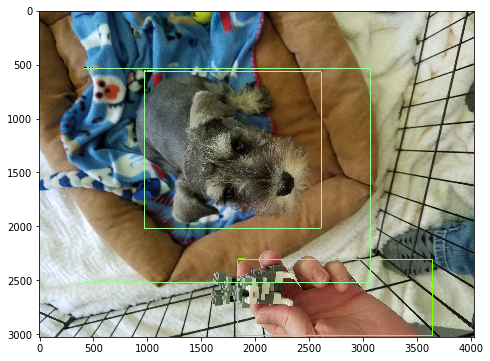

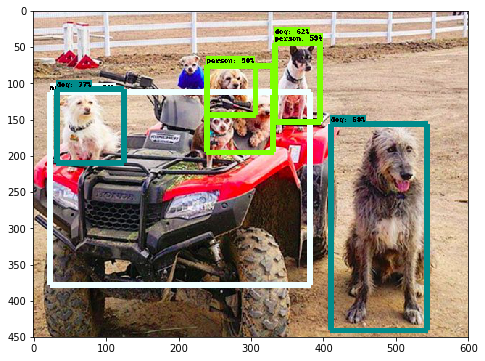

In [20]:
%time
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(image_np,output_dict['detection_boxes'],
                                                     output_dict['detection_classes'],
                                                     output_dict['detection_scores'],
                                                     category_index,
                                                     instance_masks=output_dict.get('detection_masks'),
                                                     use_normalized_coordinates=True,
                                                     line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

Object Detection: TensorFlow and OpenCV
-------------

In [65]:
%time
import cv2 as cv
import matplotlib.pyplot as plt
#Can get working out of the box or with tf_text_graph_ssd.py
location1='/home/ubuntu/test_folder/object_detection/' #we already have
location2='/home/ubuntu/rml-notebooks/ssd_mobilenet_v2_coco_2018_03_29/'
location3='/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/'
location4='/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03/'

cvNet = cv.dnn.readNetFromTensorflow(location4+'frozen_inference_graph.pb', location4+'protobuf.pbtxt')

img = cv.imread('/home/ubuntu/test_images/image2.jpg')
rows = img.shape[0]
cols = img.shape[1]
cvNet.setInput(cv.dnn.blobFromImage(img, 1.0/127.5, (300, 300), (127.5, 127.5, 127.5), swapRB=True, crop=False))
cvOut = cvNet.forward()

for detection in cvOut[0,0,:,:]:
    score = float(detection[2])
    if score > 0.3:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        cv.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), (23, 230, 210), thickness=2)

plt.imshow(img)
plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


error: OpenCV(3.4.1-dev) /tmp/opencv/modules/dnn/src/tensorflow/tf_io.cpp:56: error: (-2) Unspecified error: FAILED: ReadProtoFromTextFile(param_file, param). Failed to parse GraphDef file: /home/ubuntu/rml-notebooks/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03/protobuf.pbtxt in function ReadTFNetParamsFromTextFileOrDie


In [63]:
import tensorflow as tf
from tensorflow.python.platform import gfile

def converter(filename): 
  with gfile.FastGFile(filename,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')
    tf.train.write_graph(graph_def, 'pbtxt/', 'protobuf.pbtxt', as_text=True)
  return

In [64]:
converter(location4+'frozen_inference_graph.pb')

In [312]:
print(location4+'frozen_inference_graph.pb')

/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03/frozen_inference_graph.pb


In [315]:

# This file is useful for reading the contents of the ops generated by ruby.
# You can read any graph defination in pb/pbtxt format generated by ruby
# or by python and then convert it back and forth from human readable to binary format.

import tensorflow as tf
from google.protobuf import text_format
from tensorflow.python.platform import gfile

def pbtxt_to_graphdef(filename):
  with open(filename, 'r') as f:
    graph_def = tf.GraphDef()
    file_content = f.read()
    text_format.Merge(file_content, graph_def)
    tf.import_graph_def(graph_def, name='')
    tf.train.write_graph(graph_def, 'pbtxt/', 'protobuf.pb', as_text=False)

def graphdef_to_pbtxt(filename): 
  with gfile.FastGFile(filename,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')
    tf.train.write_graph(graph_def, 'pbtxt/', 'protobuf.pbtxt', as_text=True)
  return


graphdef_to_pbtxt(location4+'frozen_inference_graph.pb')  # here you can write the name of the file to be converted
# and then a new file will be made in pbtxt directory.

In [ ]:
freeze_graph --input_graph=/tmp/mobilenet_v1_224.pb \
  --input_checkpoint=/tmp/checkpoints/mobilenet-10202.ckpt \
  --input_binary=true \
  --output_graph=/tmp/frozen_mobilenet_v1_224.pb \
  --output_node_names=MobileNetV1/Predictions/Reshape_1


In [43]:
location4='/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03/'

In [44]:
def load_frozen_graph():
    filename = location4 + "frozen_inference_graph.pb"

    with tf.gfile.GFile(filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        new_input = tf.placeholder(tf.float32, [10], name="new_input")

        tf.import_graph_def(
            graph_def,
            # usually, during training you use queues, but at inference time use placeholders
            # this turns into "input
            input_map={"input:0": new_input},
            return_elements=None,
            # if input_map is not None, needs a name
            name="bla",
            op_dict=None,
            producer_op_list=None
        )

    checkpoint_path = tf.train.latest_checkpoint("./tmp/")

    with tf.Session(graph=graph) as sess:
        saver = tf.train.import_meta_graph(checkpoint_path + ".meta", import_scope=None)
        saver.restore(sess, checkpoint_path)

        output = sess.run("output:0", feed_dict={"input:0": np.arange(10, dtype=np.float32)})
    print "output", output

In [59]:
import tensorflow as tf

# Let's load a previously saved meta graph in the default graph
# This function returns a Saver
saver = tf.train.import_meta_graph(location4+'model.ckpt.meta')

# We can now access the default graph where all our metadata has been loaded
graph = tf.get_default_graph()

# Finally we can retrieve tensors, operations, collections, etc.
global_step_tensor = graph.get_tensor_by_name('loss/global_step:0')
train_op = graph.get_operation_by_name('loss/train_op')
hyperparameters = tf.get_collection('hyperparameters')

KeyError: "The name 'loss/global_step:0' refers to a Tensor which does not exist. The operation, 'loss/global_step', does not exist in the graph."

In [58]:
with tf.Session() as sess:
    # To initialize values with saved data
    saver.restore(sess, location4+'model.ckpt.data-00000-of-00001')
    print(sess.run(global_step_tensor)) # returns 1000

DataLossError: Unable to open table file /home/ubuntu/rml-notebooks/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03/model.ckpt.data-00000-of-00001: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_INT64], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op u'save/RestoreV2', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/ubuntu/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ubuntu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-8128d06035f5>", line 5, in <module>
    saver = tf.train.import_meta_graph(location4+'model.ckpt.meta')
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1955, in import_meta_graph
    **kwargs)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/framework/meta_graph.py", line 743, in import_scoped_meta_graph
    producer_op_list=producer_op_list)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/framework/importer.py", line 513, in import_graph_def
    _ProcessNewOps(graph)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/framework/importer.py", line 303, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3540, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3428, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/home/ubuntu/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

DataLossError (see above for traceback): Unable to open table file /home/ubuntu/rml-notebooks/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03/model.ckpt.data-00000-of-00001: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_INT64], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


In [53]:
hyperparameters

[]

In [47]:
location4+'/model.ckpt-1000.meta'

'/home/ubuntu/rml-notebooks/ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03//model.ckpt-1000.meta'